### POLİNOM REGRESYON :

a0 + a1x1 + a2x2**2 + ---- anxn**n

şeklinde ki denklemlere sahip denklemlerdir.

polinom regresyonda amacımız eğriyi noktalara denk getirmeye çalışmaktır. Bazen mackineye yaptırdığımız tahmin sonucında linear regresyon hiçibir işe yaramaz. işte biz elde edilen çıktılarımızı lineare yakın mükemmel hale getirmeye çalışır.

veri setini iyi bilmek gerekiyor. şimdi üzerinde çalışacağımız veri setine grafik olarak bakalım.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("polynomial.csv", sep=";")
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


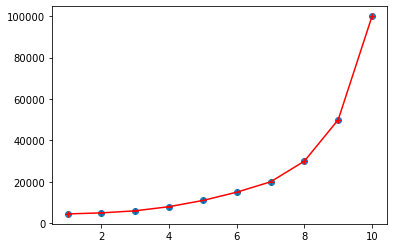

In [59]:
plt.scatter(df.deneyim, df.maas, marker="o")
plt.plot(df.deneyim, df.maas, marker="+", color="red")
plt.show()

Grafiğe baktığımızda düz linear yani doğrusal uzanan bir eğri yok. elimiz de 1 tane bağımlı deneyim değişkeni, 1 tane de bağımsız maaş değişkeni var. eğer 1 tane bağımsız değişkenimiz varsa linear regresyon ile yapardık. ama çizgi doğrusal değil
işte bu durumlarda çizgiyi değerlerden tam geçirmek için polinom regresyonu kullanılır.

df dataframemiz de ki değişkenleri polinom regresyon ile aralarında ki ilişkiyi inceleyelim. kolay hesaplamak açısından 2. dereceden bir polinoma kadar hesaplayalım.

y = a0+ a1xi +a2xi**2

denklemini elde edene kadar hesaplayalım.

### TEORİ : 

In [60]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


In [61]:
# 1. adım iki değişkenin toplamlarını bulalım : 
x_top = df["deneyim"].sum()
y_top = df["maas"].sum()
# 2. adım iki değişkenin çarpımlarının toplamları bulunur. :
yx = (df["deneyim"] * df["maas"]).sum()
# 3. adım bağımsız değişkenimiz olan deneyim değişkeninin karesi, küpü ve 4. kuvvetlerinin toplamları alınır.
x2 = (df["deneyim"]**2).sum()
x3 = (df["deneyim"]**3).sum()
x4 = (df["deneyim"]**4).sum()
# 4. adım bağımsız değişkeninin karesi ile bağımlı değişken çarpılır ve toplamları alınır.
yx2 = ((df["deneyim"]**2) * df["maas"]).sum()

normal denklemi yazalım :

y_top = n*a0 + x_top*a1 + x2*a2

yx = a0*x_top + a1*x2 + a2*x3

yx2 = a0*x2 + a1*x3 + a2*x4

In [62]:
n = len(df["maas"])
n

10

In [ ]:
249500 = a0*10 + a1*55 + a2*385
2039500 = a0*55 + a1*385 + a2*3025
17971500 = a0*385 + a1*3025 + a2*25333

In [63]:
a = np.array([[10,55,385],[55,385,3025],[385,3025,25333]])
b = np.array([249500,2039500,17971500])
a0, a1, a2 = np.linalg.solve(a,b)
a0 = round(a0,2)
a1 = round(a1,2)
a2 = round(a2,2)
print("a0 değeri = ", a0 , "a1 değeri = ", a1 , "a2 değeri = ", a2)

a0 değeri =  23216.67 a1 değeri =  -13287.12 a2 değeri =  1943.18


Y = 23216.67 -13287.12*X + 1943.18*(X**2)

denklemini elde ettik. şimdi deneyim sutunumuzda ki değerleri teker teker yerine koyup tahminde bulunalım.

In [64]:
df["tahmin_one"] =  a0 + (a1*df["deneyim"]) + (a2*(df["deneyim"]**2))
df

,deneyim,maas,tahmin_one
0,1,4500,11872.73
1,2,5000,4415.15
2,3,6000,843.93
3,4,8000,1159.07
4,5,11000,5360.57
5,6,15000,13448.43
6,7,20000,25422.65
7,8,30000,41283.23
8,9,50000,61030.17
9,10,100000,84663.47


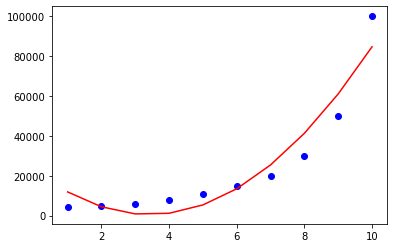

In [65]:
# şimdi birde grafiğimizi çizdirelim.
plt.scatter(df.deneyim, df.maas, color="blue", marker="o")
plt.plot(df.deneyim, df.tahmin_one, color="red")
plt.show()

## PYTHON İLE YAPALIM : 

In [66]:
from sklearn.linear_model import LinearRegression
# normal denklem için LinearRegression import edildi.

In [67]:
from sklearn.preprocessing import PolynomialFeatures
# polinom regresyona çevirmek için PolynomialFeatures import edildi.

In [68]:
reg_polinom = PolynomialFeatures(degree=2)
# reg_polinom adlı bir değişken ürettim ve PolynomialFeatures degree=2 diyerek 2. dereceye kadar denlem kur dedim.
# Y = A0+ A1*X + A2*X**2 YE KADAR.

In [69]:
x_polinom = reg_polinom.fit_transform(df[["deneyim"]])
# normal denklem elde etmeden önce biz x_polinom isimli bir değişken oluşturduk ve fit_transform ile bağımsız
# değişkenimizi linear olarak fit etmeye hazır hale getirdik.

In [70]:
reg = LinearRegression()

In [73]:
reg.fit(x_polinom, df["maas"])

LinearRegression()

In [76]:
# artık tahminimizi yapabiliriz. 
tahmin = reg.predict(x_polinom)
tahmin_1 = []
for i in tahmin : 
    tahmin_1.append(round(i,2))
df["tahmin_two"] = tahmin_1
df

,deneyim,maas,tahmin_one,tahmin_two
0,1,4500,11872.73,11872.73
1,2,5000,4415.15,4415.15
2,3,6000,843.93,843.94
3,4,8000,1159.07,1159.09
4,5,11000,5360.57,5360.61
5,6,15000,13448.43,13448.48
6,7,20000,25422.65,25422.73
7,8,30000,41283.23,41283.33
8,9,50000,61030.17,61030.30
9,10,100000,84663.47,84663.64


In [ ]:
# bir örnek daha yapalım.

In [78]:
df = pd.DataFrame({"Sıcaklık": [20,30,40,50,60,70],
                  "Kuvvet" : [1130,995,935,890,865,850]})
df

,Sıcaklık,Kuvvet
0,20,1130
1,30,995
2,40,935
3,50,890
4,60,865
5,70,850


In [81]:
# 1-) Linear regresyon ile yapalım : 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[["Sıcaklık"]], df["Kuvvet"])
tahmin = reg.predict(df[["Sıcaklık"]])
tahmin_linear = []
for i in tahmin : 
    tahmin_linear.append(int(i))
df["tahmin_linear"] = tahmin_linear
df

,Sıcaklık,Kuvvet,tahmin_linear
0,20,1130,1075
1,30,995,1022
2,40,935,970
3,50,890,917
4,60,865,865
5,70,850,813


In [84]:
# 2 polinom regresyon ile 2.dereceye kadar tahmin yapalım.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polinom_reg = PolynomialFeatures(degree=2)
x_polinom = polinom_reg.fit_transform(df[["Sıcaklık"]])
reg = LinearRegression()
reg.fit(x_polinom, df["Kuvvet"])
tahmin = reg.predict(x_polinom)
tahmin_polinom = []
for i in tahmin : 
    tahmin_polinom.append(int(i))
df["tahmin_polinom"] = tahmin_polinom
df

,Sıcaklık,Kuvvet,tahmin_linear,tahmin_polinom
0,20,1130,1075,1119
1,30,995,1022,1014
2,40,935,970,935
3,50,890,917,882
4,60,865,865,856
5,70,850,813,857


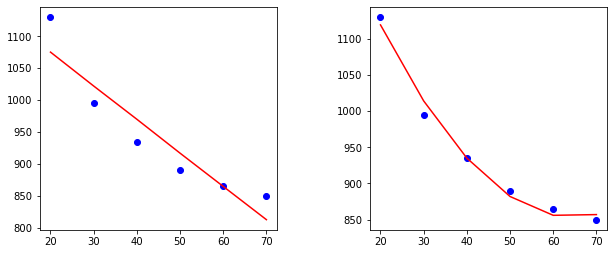

In [88]:
fig, ((axes1, axes2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes1.scatter(df.Sıcaklık, df.Kuvvet, marker="o", color="blue")
axes1.plot(df.Sıcaklık, df.tahmin_linear, color="red")
axes2.scatter(df.Sıcaklık, df.Kuvvet, marker="o", color="blue")
axes2.plot(df.Sıcaklık, df.tahmin_polinom, color="red")
plt.tight_layout(pad=6)
plt.show()